In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r'../raw_data\raw_analyst_ratings.csv'
df = pd.read_csv(file_path)

# Display the first few rows to understand the data structure
print(df.head())


   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-26 04:30:07-04:00 

In [8]:
# 1. Obtain basic statistics for textual lengths (like headline length)
# Assuming there is a 'headline' column in the dataset
df['headline_length'] = df['headline'].apply(len)

# Basic statistics for headline lengths
headline_stats = df['headline_length'].describe()
print("Headline Length Statistics:")
print(headline_stats)



Headline Length Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


In [15]:
# 2. Count the number of articles per publisher
# Assuming there is a 'publisher' column in the dataset
articles_per_publisher = df['publisher'].value_counts()

# Display the number of articles per publisher
print("Articles Per Publisher:")
print(articles_per_publisher)

# Clean the 'publisher' column by stripping spaces and standardizing capitalization
df['publisher'] = df['publisher'].str.strip().str.lower()

# Count the number of unique publishers
unique_publishers_count = df['publisher'].nunique()

# Display the number of unique publishers
print(f"Number of unique publishers: {unique_publishers_count}")

Articles Per Publisher:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64
Number of unique publishers: 1034


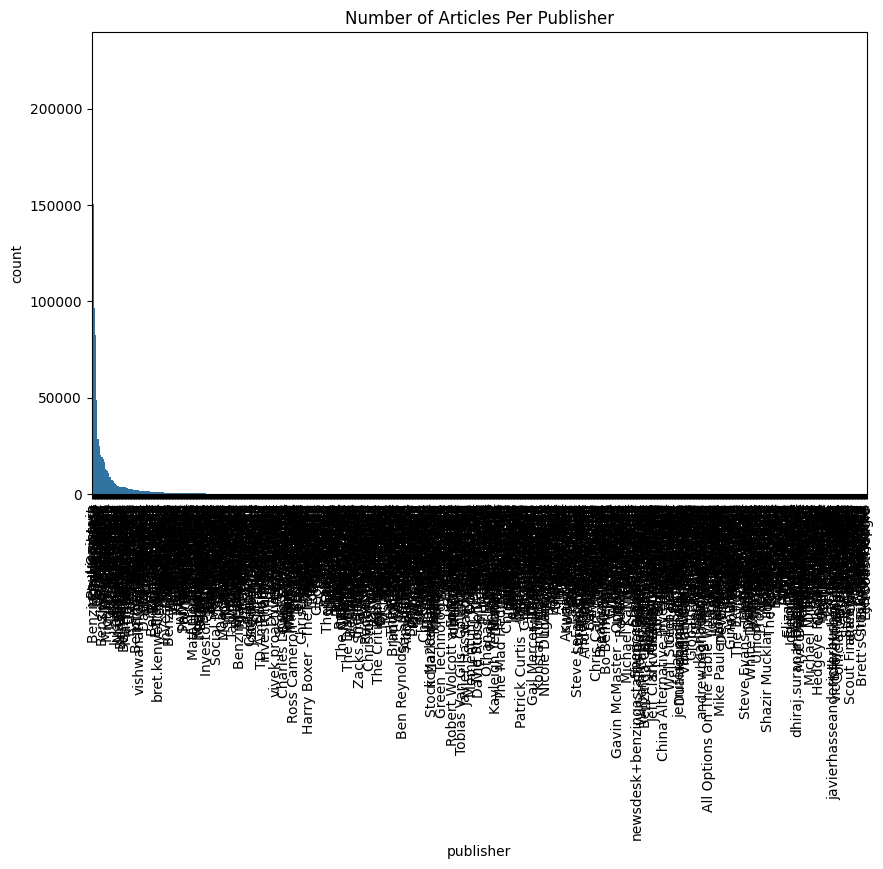

In [10]:
# Plot a bar chart for the number of articles per publisher
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='publisher', order=articles_per_publisher.index)
plt.title('Number of Articles Per Publisher')
plt.xticks(rotation=90)
plt.show()

C:\Users\ufanc\AppData\Local\Temp\ipykernel_12460\2368176639.py:7: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['date'].dt.to_period('M')


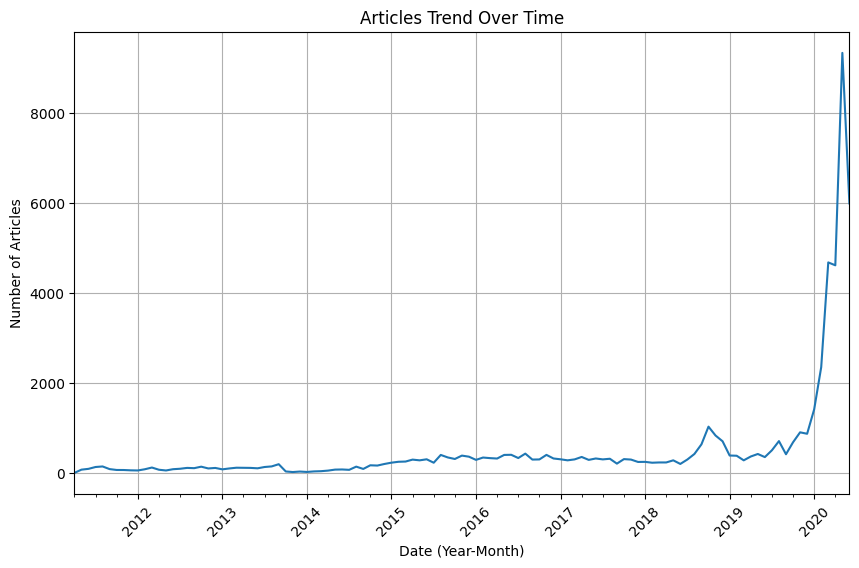

In [12]:
# 3. Analyze the publication dates to see trends over time
# Assuming there is a 'publication_date' column in the dataset
# Convert 'publication_date' to datetime if not already in datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Extract the year and month from the publication date
df['year_month'] = df['date'].dt.to_period('M')

# Count the number of articles per month
articles_per_month = df.groupby('year_month').size()

# Plot the trend over time
plt.figure(figsize=(10, 6))
articles_per_month.plot(kind='line')
plt.title('Articles Trend Over Time')
plt.ylabel('Number of Articles')
plt.xlabel('Date (Year-Month)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [14]:
# 4. Summary of the articles by each publisher
# Grouping the articles by publisher and creating a summary
publisher_summary = df.groupby('publisher').agg({
    'headline': 'count',  # Number of articles
    'headline_length': 'mean',  # Average headline length
    'date': ['min', 'max']  # Publication date range
}).reset_index()

# Rename columns for better readability
publisher_summary.columns = ['Publisher', 'Article Count', 'Avg Headline Length', 'Earliest Publication', 'Latest Publication']

# Display the publisher summary
print("Publisher Summary:")
print(publisher_summary)

Publisher Summary:
                       Publisher  Article Count  Avg Headline Length  \
0                     47ertrends             18            47.000000   
1                           AARP              7            56.000000   
2                    ABNNewswire             13            92.615385   
3                          Aakin              5            35.600000   
4               Aaron Jackson.Ed             16            37.187500   
...                          ...            ...                  ...   
1029  vic@forextraininggroup.com              1            51.000000   
1030     vishwanath@benzinga.com           1830            77.045355   
1031   vivek.proactive@gmail.com            120            79.466667   
1032              wallstreet1928              8            40.500000   
1033                   webmaster          20313            58.303845   

          Earliest Publication        Latest Publication  
0                          NaT                       NaT 

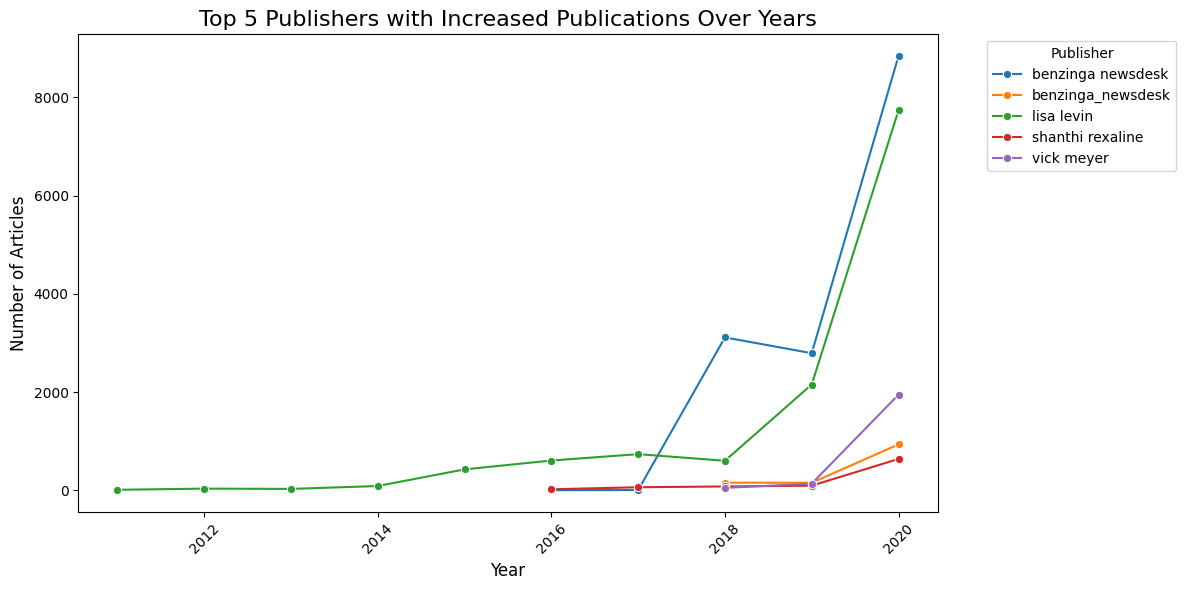

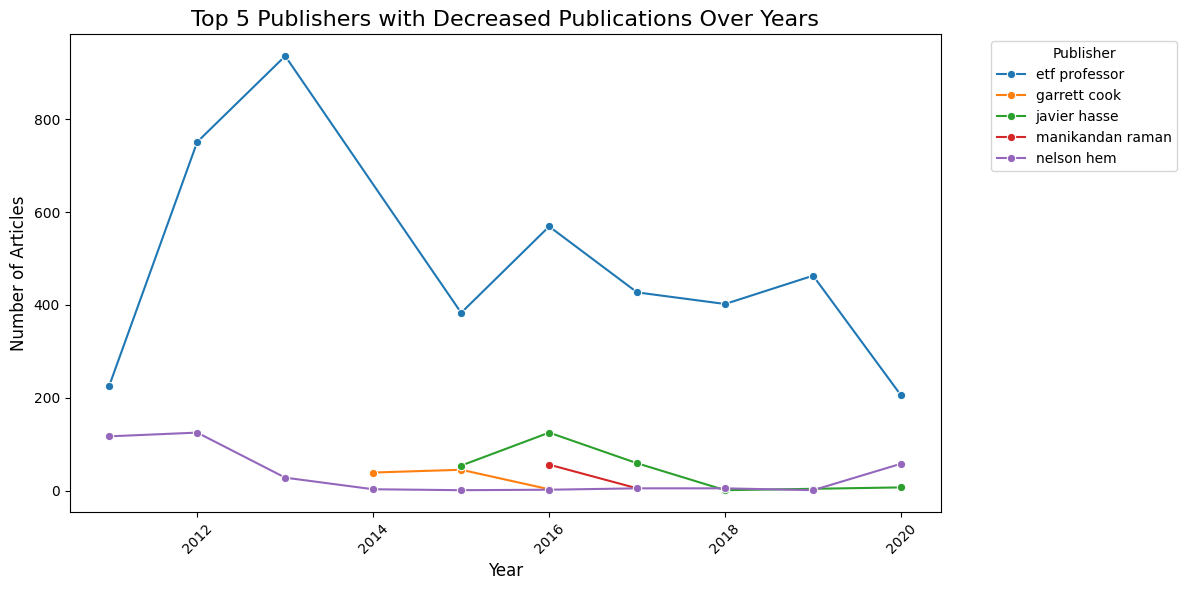

Top 5 publishers with increased publications: ['benzinga newsdesk' 'lisa levin' 'vick meyer' 'benzinga_newsdesk'
 'shanthi rexaline']
Top 5 publishers with decreased publications: ['nelson hem' 'manikandan raman' 'javier hasse' 'garrett cook'
 'etf professor']


In [20]:
# Clean the 'publisher' column by stripping spaces and standardizing capitalization
df['publisher'] = df['publisher'].str.strip().str.lower()

# Convert the 'publication_date' column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Extract the year from the 'publication_date'
df['year'] = df['date'].dt.year

# Group by publisher and year, counting the number of articles published per publisher per year
articles_per_publisher_per_year = df.groupby(['publisher', 'year']).size().reset_index(name='article_count')

# Calculate the difference in article counts between consecutive years for each publisher
articles_per_publisher_per_year['article_count_diff'] = articles_per_publisher_per_year.groupby('publisher')['article_count'].diff()

# Calculate the total change in article counts for each publisher
total_change_per_publisher = articles_per_publisher_per_year.groupby('publisher')['article_count_diff'].sum().reset_index()

# Identify top 5 publishers with the highest increase in publications
top_5_increased_publishers = total_change_per_publisher.nlargest(5, 'article_count_diff')

# Identify top 5 publishers with the highest decrease in publications
top_5_decreased_publishers = total_change_per_publisher.nsmallest(5, 'article_count_diff')

# Plot the top 5 increased publishers over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=articles_per_publisher_per_year[articles_per_publisher_per_year['publisher'].isin(top_5_increased_publishers['publisher'])],
             x='year', y='article_count', hue='publisher', marker='o')
plt.title('Top 5 Publishers with Increased Publications Over Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Articles', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Publisher', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plot the top 5 decreased publishers over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=articles_per_publisher_per_year[articles_per_publisher_per_year['publisher'].isin(top_5_decreased_publishers['publisher'])],
             x='year', y='article_count', hue='publisher', marker='o')
plt.title('Top 5 Publishers with Decreased Publications Over Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Articles', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Publisher', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Display the results
print(f"Top 5 publishers with increased publications: {top_5_increased_publishers['publisher'].values}")
print(f"Top 5 publishers with decreased publications: {top_5_decreased_publishers['publisher'].values}")
